In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
plt.style.use('seaborn')
from tabulate import tabulate

### Data cleaning

In [34]:
s = pd.Series(np.random.randn(87))
print(s.ndim)

1


In [35]:
ary = np.array([1,2,3,5,8])
ary = ary+2
print(ary[1])

4


In [2]:
# importing data
df = pd.read_csv(r"C:\Users\Suwani Gunasekara\OneDrive\Documents\Sem 7 ML\winequality-white_onezero.csv")

In [3]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality_
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,0
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,0
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,0
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,0
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,0


In [4]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality_
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,0.216415
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.411842
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,0.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,0.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,0.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,0.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,1.000000


In [5]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality_                0
dtype: int64

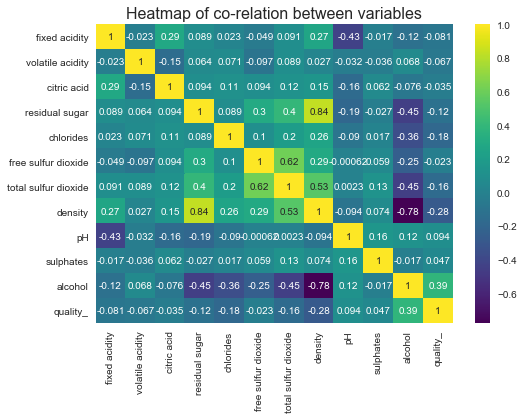

In [6]:
# checking for multicolinearity
sns.heatmap(df.corr(),annot=True,cmap='viridis')
plt.title('Heatmap of co-relation between variables',fontsize=16)
plt.show()

The correlation between Density and Residual sugar is 0.84. As this score is higher than 0.7, there is multicolinearity present between these variables. Therefore, one of the variables out of these two should be removed. The correlation beteen density and quality is higher than the correlation between residual sugar and quality. Therefore, the variable residual quality is removed from the dataset. 

The correlation between Density and alcohol is -0.78. As the magnitude of this score is higher than 0.7, there is multicolinearity present between these variables. Therefore, one of the variables out of these two should be removed. The correlation magnitude between density and quality is lower than the correlation magnitude between alcohol and quality. Therefore, the variable density is removed from the dataset. 

(<b> Note <b>:I removed the variable density while keeping the other two variables and ran a regression. The accuracy I got for that model is 0.801959984 which is much lower compared to the accuracy I get for this model)

In [7]:
# removing variable residual sugar
df.drop('residual sugar', inplace=True, axis=1)
df.drop('density', inplace=True, axis=1)

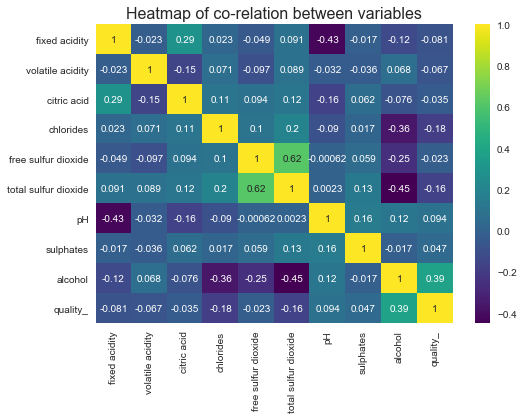

In [8]:
# checking for multicolinearity
sns.heatmap(df.corr(),annot=True,cmap='viridis')
plt.title('Heatmap of co-relation between variables',fontsize=16)
plt.show()

All the correlations are lower than 0.7. Therefore, the model does not suffer from partial correlation.

In [9]:
# add a ones column 
df.insert(0, 'Ones', 1)
cols = df.shape[1]
Xdata = df.iloc[:,0:cols-1]
ydata = df.iloc[:,cols-1:cols]

In [10]:
# convert to numpy arrays and initalize the parameter array theta
X = np.array(Xdata.values)
y = np.array(ydata.values)
theta = np.zeros(10)

### Model building

In [11]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [12]:
# This is the error function. We need to minimize this
def cost(theta, X, y):
    theta = np.matrix(theta)
    X = np.matrix(X)
    y = np.matrix(y)
    first = np.multiply(-y, np.log(sigmoid(X * theta.T)))
    second = np.multiply((1 - y), np.log(1 - sigmoid(X * theta.T)))
    return np.sum(first - second) / (len(X))

In [13]:
def gradient(theta, X, y):
    theta = np.matrix(theta)
    X = np.matrix(X)
    y = np.matrix(y)
    
    parameters = int(theta.ravel().shape[1])
    grad = np.zeros(parameters)
    
    error = sigmoid(X * theta.T) - y
    
    for i in range(parameters):
        term = np.multiply(error, X[:,i])
        grad[i] = np.sum(term) / len(X)
    
    return grad

In [14]:
gradient(theta, X, y)

array([2.83585137e-01, 1.97197325e+00, 8.16950796e-02, 9.65322581e-02,
       1.46277052e-02, 1.01768069e+01, 4.20753879e+01, 8.98330951e-01,
       1.36685382e-01, 2.78653668e+00])

In [15]:
import scipy.optimize as opt
result = opt.fmin_tnc(func=cost, x0=theta, fprime=gradient, args=(X, y))
result

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in log
  import sys


(array([-1.18204539e+01,  3.83771870e-02, -3.35334729e+00, -7.31240776e-01,
        -1.75866541e+01,  1.41238624e-02, -2.28292147e-03,  9.07259611e-01,
         1.10459331e+00,  7.86030626e-01]),
 100,
 3)

In [16]:
def predict(theta, X):
    probability = sigmoid(X * theta.T)
    return [1 if x >= 0.5 else 0 for x in probability]

In [17]:
theta_min = np.matrix(result[0])
predictions = predict(theta_min, X)
correct = [1 if ((a == 1 and b == 1) or (a == 0 and b == 0)) else 0 for (a, b) in zip(predictions, y)]
accuracy = (sum(map(int, correct)) / len(correct))
print (accuracy)

0.8040016333197223


In [18]:
TP = [1 if ((a == 1 and b == 1)) else 0 for (a, b) in zip(predictions, y)]
TN = [1 if ((a == 0 and b == 0)) else 0 for (a, b) in zip(predictions, y)]
FN = [1 if ((a == 0 and b == 1)) else 0 for (a, b) in zip(predictions, y)]
FP = [1 if ((a == 1 and b == 0)) else 0 for (a, b) in zip(predictions, y)]

In [19]:
TPsum = sum(map(int, TP))
TNsum = sum(map(int, TN))
FNsum = sum(map(int, FN))
FPsum = sum(map(int, FP))

In [20]:
Accuracy = (TPsum + TNsum)/(TPsum + TNsum + FPsum + FNsum)
#print(Accuracy)

In [21]:
precisionP = TPsum / (TPsum + FPsum)
print(f"precision: {precisionP:4.2f}")

precision: 0.61


In [22]:
recallP = TPsum / (TPsum + FNsum)
#print(f"recall: {recallP:4.2f}")

In [23]:
precisionN = TNsum / (TNsum + FNsum)
#print(f"precision: {precisionN:4.2f}")

In [24]:
recallN = TNsum / (TNsum + FPsum)
#print(f"recall: {recallN:4.2f}")

In [25]:
#from sklearn import metrics
#print(metrics.classification_report(y,predictions))

###  (1) Logistic Regression algorithm

In [26]:
result[0]

array([-1.18204539e+01,  3.83771870e-02, -3.35334729e+00, -7.31240776e-01,
       -1.75866541e+01,  1.41238624e-02, -2.28292147e-03,  9.07259611e-01,
        1.10459331e+00,  7.86030626e-01])

In [27]:
Xdata.columns

Index(['Ones', 'fixed acidity', 'volatile acidity', 'citric acid', 'chlorides',
       'free sulfur dioxide', 'total sulfur dioxide', 'pH', 'sulphates',
       'alcohol'],
      dtype='object')

<b>Below is the equation of the built model<b>

$ Y = -11.8204539 + 0.0383771870*fixedAcidity - 3.35334729*volatileAcidity - 0.731240776*citricAcid -17.5866541*chlorides + 0.0141238624*freeSulfurDioxide - 0.00228292147*totalSulfurDioxide + 0.907259611e-01*pH + 1.10459331*sulphates + 0.786030626e*alcohol  $

### (2)  Accuracy, Precision and Recall for the algorithm you have implemented.

In [28]:
data = [[0,precisionN,recallN],[1,precisionP,recallP],['Accuracy',"----------",accuracy]]

print(tabulate(data, headers = ["percision","recall"]))

          percision             recall
--------  ------------------  --------
0         0.8239531742458353  0.953622
1         0.6096491228070176  0.262264
Accuracy  ----------          0.804002


In [32]:
recallP =  / (TPsum + FNsum)
print(f"recall: {recallP:4.4f}")

recall: 0.2623


In [33]:
precisionP = TPsum / (TPsum + FPsum)
print(f"precision: {precisionP:4.4f}")

precision: 0.6096


In [31]:
Accuracy = (TPsum + TNsum)/(TPsum + TNsum + FPsum + FNsum)
print(Accuracy)

0.8040016333197223


### (3) Most important three factors

Based on the magnititude of the coefficients (from most important to least important),
 1. Chlorides
 2. Volatile Acidity
 3. Sulphates